In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
# regression => 특정한 숫자를 예측

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.array( [-7., -4., -1., 2., 5., 8., 11., 14.] )
y = np.array( [3., 6., 9., 12., 15., 18., 21., 24.] )
X, y, type(X), type(y)

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 numpy.ndarray,
 numpy.ndarray)

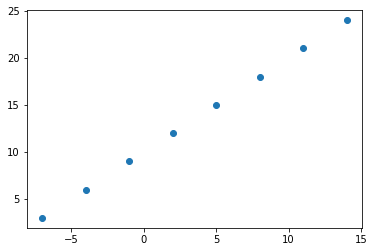

In [6]:
plt.scatter(X, y);

In [7]:
# input shape : 모델에 학습할 데이터의 shape
# output shape : 모델이 학습 후 알려줄 출력의 shape
# input shape나 output shape는 우리가 해결하려는 문제에 따라서 다양하다!
# Neural Network는 숫자를 받아들이고, 숫자로 결과를 알려준다!
# 대부분 이런 숫자를 tensor로 표현을 한다!

In [8]:
# 집값 예측에 대한 일반적인 regression 모델의 입력과 출력 형태
house_info = tf.constant([ "bedroom", "bathroom", "garage"] )
house_price = tf.constant( [939700] )
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [9]:
house_info.shape

TensorShape([3])

In [10]:
X = tf.constant( [-7., -4., -1., 2., 5., 8., 11., 14.] )
y = tf.constant( [3., 6., 9., 12., 15., 18., 21., 24.] )
X, y, type(X), type(y)

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

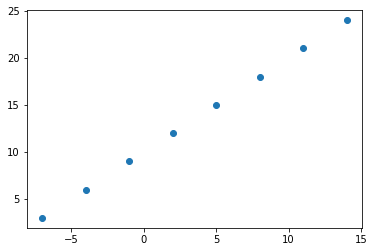

In [11]:
plt.scatter(X, y);

In [12]:
input_shape = X[0].shape

In [13]:
output_shape = y[0].shape

In [14]:
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [15]:
# Tensorflow 로 모델링을 하는 단계
# 1) 모델을 생성 : 신경망을 이루는 계층을 설계 (Sequential or Function) / 전이학습 (transfer leaning)시 기존에 학습한 모델을 불러오기
# 2) 모델을 컴파일 : 모델이 어떻게 실행될지 설정 (모델의 평가는 어떻게 할 것인지 학습은 어떻게 개선시킬지)
# 3) 모델을 학습 : 데이터에서 패턴을 찾는 시간!

# Sequencial => Functional => Subclass

In [16]:
tf.random.set_seed(42)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [18]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

In [19]:
X

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

In [21]:
tf.expand_dims(X, axis = -1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [22]:
X

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

In [23]:
model.fit( tf.expand_dims(X, axis = -1), y, epochs = 5 )

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [24]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
model.predict([2])

1/1 [==============================] - 0s 68ms/step


array([[1.54012]], dtype=float32)

In [27]:
model.predict([17])  # 27이라는 값을 기대했는데...

1/1 [==============================] - 0s 36ms/step


array([[12.716021]], dtype=float32)

In [29]:
# Tensorflow 로 모델을 개선시키기

# 1) 모델을 생성 : 신경망을 이루는 계층을 더 추가하거나, 각 계층의 뉴런을 늘리거나, 각 계층의 활성함수를 변경해 보거나...
# 2) 모델을 컴파일 : optimizer를 바꾸어 보거나, leaning rate를 변경해 본다.
# 3) 모델을 학습 : 학습을 더 많이 시킨다. 더 많은 데이터를 추가해 준다.

# hyperparameter 수정한다! => 각 모델을 이루는 계층 및 모델에 우리가 직접 설정을 변경할 수 있다.
# hyperparameter tuning의 방법은 해결하려는 문제, 데이터 등등에 따라서 굉장히 다양하다!

In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.fit( tf.expand_dims(X, axis = -1), y, epochs = 100 )

Epoch 1/100
1/1 [==============================] - 0s 347ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] -

In [32]:
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
model.predict([17.0])

1/1 [==============================] - 0s 39ms/step


array([[30.158512]], dtype=float32)

In [34]:
# 모델 만들기 -> 모델 평가 -> 모델을 개선해서 다시 만들기 -> 모델 평가 -> 모델을 개선해서 다시 만들기 -> 모델 평가 -> ... -> 모델 저장

In [35]:
# 평가를 숫자로 보기 보다 시각화 (visualization)해서 보면 더 좋겠다!
# 시각화의 대상
# 1) 데이터 : 우리가 다루는 데이터가 어떻게 생겼는지
# 2) 모델 자체 : 모델의 구조 및 shape
# 3) 모델의 학습 : 모델이 학습을 하면서 어떻게 개선되고 있는지
# 4) 모델의 예측 : 모델이 예측한 결과를 시각화

In [36]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [37]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [38]:
# y = X + 10의 관계
y = X + 10

In [39]:
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [41]:
# 머신러닝을 할 때 준비하는 데이터셋
# 1) traning set : 모델이 학습하는 대상, 전체 데이터의 70 ~ 80%로 준비 / 수능 공부
# 2) validation set : 모델이 학습을 하면서 튜닝, 즉 학습을 잘 하고 있는지 확인하는 데이터, 전체 데이터의 10 ~ 15% / 수능 모의고사
# 3) test set : 모델을 평가할 때 사용하는 데이터 / 전체 데이터의 10 ~ 15% / 수능

# 실제 사례에서는 test set를 별도록 준비해 놓는다! => 이전에 전혀 학습하지 않은 데이터로 데이터하겠다라는 의미

In [42]:
len(X)

50

In [43]:
X_train = X[:40]
y_train = y[:40]

In [44]:
X_test = X[40:]
y_test = y[40:]

In [45]:
len(X_train), len(X_test)

(40, 10)

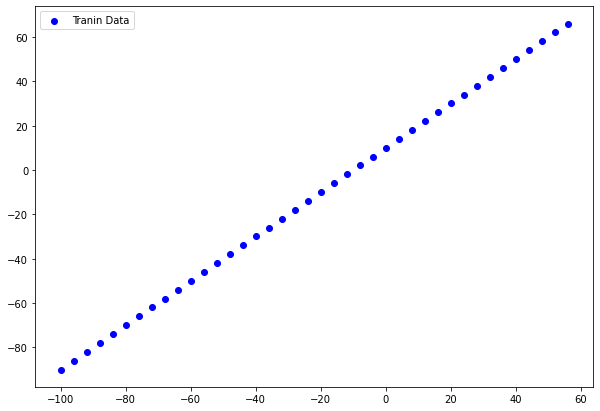

In [48]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "blue", label = "Tranin Data")
plt.legend();

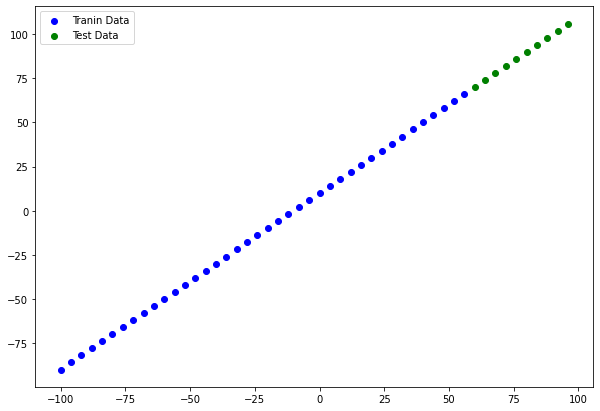

In [49]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "blue", label = "Tranin Data")
plt.scatter(X_test, y_test, c = "green", label = "Test Data")
plt.legend();

In [52]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

# model.fit( tf.expand_dims(X, axis = -1), y, epochs = 100 )

In [53]:
model.summary()

ValueError: ignored

In [55]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [56]:
# model.summary()를 실행해서...
# 1) 모델에 어떤 계층을 포함하고 있는지, 
# 2) 출력의 shape
# 3) 파라미터의 갯수

# Total params : 모델에 존재하는 파라미터의 갯수
# Trainable params : 모델이 학습을 하면서 내용을 갱신할 수 있는 파라미터 (패턴)의 갯수
# Non-trainable params : Trainable params의 반대 개념

In [57]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=[1])
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [58]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [59]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 24ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 12ms/ste

In [60]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [61]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [62]:
from tensorflow.keras.utils import plot_model

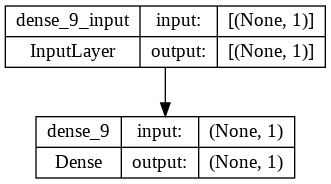

In [63]:
plot_model(model, show_shapes = True)

In [64]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 195ms/step


In [65]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [66]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_preds
):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c = "blue", label = "Training Data")
    plt.scatter(test_data, test_labels, c = "green", label = "Testing Data")
    plt.scatter(test_data, predictions, c = "red", label = "Predictions")
    plt.legend();

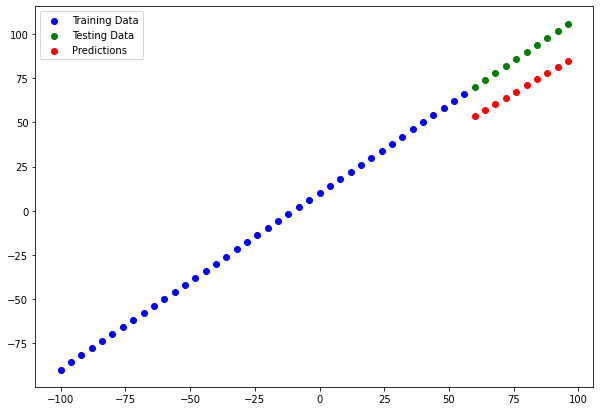

In [67]:
plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data  = X_test,
    test_labels = y_test,
    predictions = y_preds
)

In [68]:
# regression에서 평가를 할 때 사용하는 지표 (metric)
# 1) MAE (Mean Absolute Error) : 실제 값과 예측값 사이의 값들의 평균
# 2) MSE (Mean Squared Error) : 실제 값과 예측값 사이의 값들을 제곱하고 그 평균

# MAE이든 MSE이든 이 값들이 커진다면, 실제값과 예측값 사이의 차이가 더 크게 있다!
# 작으면 작을수록 좋다!

In [69]:
model.evaluate(X_test, y_test)  # 모델 컴파일시 지정한 loss나 metric의 값이다!

1/1 [==============================] - 0s 109ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [70]:
mae = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_preds
)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [71]:
y_test.shape

(10,)

In [72]:
y_preds.shape

(10, 1)

In [73]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [74]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [75]:
y_preds.shape

(10, 1)

In [76]:
y_preds.squeeze().shape

(10,)

In [77]:
y_preds.squeeze()

array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
       74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)

In [78]:
mae = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_preds.squeeze()
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [79]:
mse = tf.metrics.mean_squared_error(
    y_true = y_test,
    y_pred = y_preds.squeeze()
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.5734>

In [80]:
tf.reduce_mean ( tf.abs(y_test - y_preds.squeeze()) )

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

In [98]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, y_pred)

In [99]:
def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)

In [100]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 38ms/step


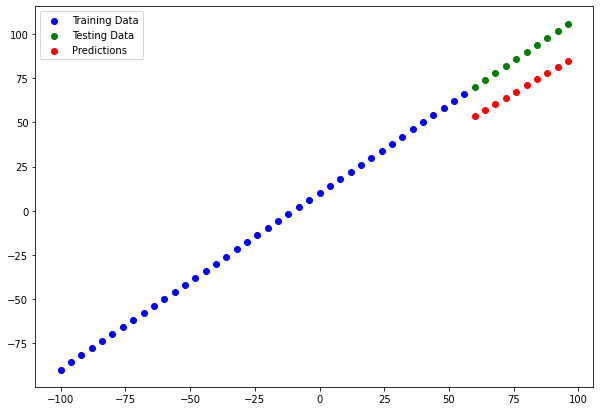

In [101]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [102]:
y_test.shape

(10,)

In [103]:
y_preds_1.squeeze().shape

(10,)

In [105]:
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.5734)

In [115]:
# model_2 : 기본 model_1에 layer 1개 더 추가

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 6ms/st

1/1 [==============================] - 0s 38ms/step


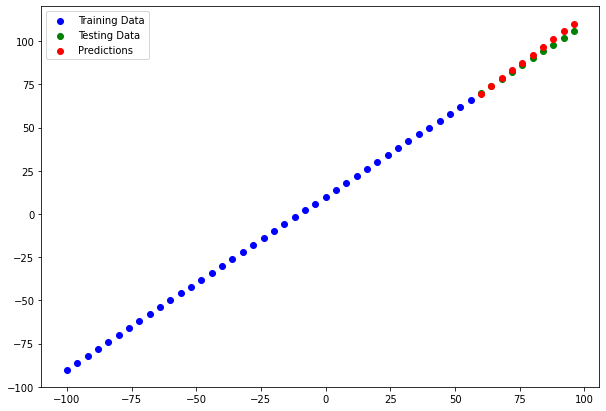

In [116]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [117]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098641, 5.4595404)

In [112]:
# model_3 : 기본 model_2에 학습을 오래시킨다 100 -> 500

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose = 0)

1/1 [==============================] - 0s 39ms/step


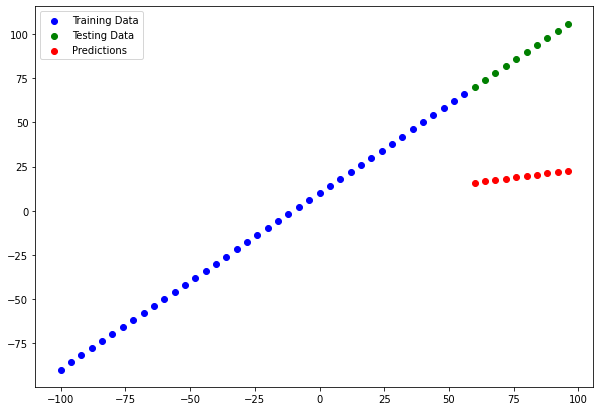

In [113]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [114]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.687874, 4804.4736)

In [118]:
model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3]
]
model_results

[['model_1', 18.745327, 353.5734],
 ['model_2', 1.9098641, 5.4595404],
 ['model_3', 68.687874, 4804.4736]]

In [120]:
import pandas as  pd
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,1.909864,5.459540
2,model_3,68.687874,4804.473633


In [121]:
# TensorFlow에서 모델을 저장하는 방법 2가지
# 1) SavedModel format (default)
# 2) HDF5 format

In [122]:
model_2.save("best_model_SavedModel_format")

In [123]:
model_2.save("best_model_SavedModel_format.h5")

In [124]:
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [125]:
model_2_preds = model_2.predict(X_test)

1/1 [==============================] - 0s 25ms/step


In [126]:
saved_model_preds = loaded_saved_model.predict(X_test)

1/1 [==============================] - 0s 208ms/step


In [127]:
mae(y_test, saved_model_preds.squeeze()).numpy()

1.9098641

In [128]:
mae(y_test, model_2_preds.squeeze()).numpy()

1.9098641

In [129]:
from google.colab import files

In [130]:
files.download("best_model_SavedModel_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [131]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
# https://www.kaggle.com/datasets/mirichoi0218/insurance
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [134]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [135]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [136]:
# neural network (신경망)은 숫자만 다룰 수 있다!

In [137]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [138]:
# feature(X)와 label(y)를 분리
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [139]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [140]:
X.shape

(1338, 11)

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [143]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [144]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7887.1597 - mae: 7887.1597
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7578.0840 - mae: 7578.0840
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7514.6162 - mae: 7514.6162
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7694.1348 - mae: 7694.1348
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.9121 - mae: 7595.9121
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7735.9106 - mae: 7735.9106

In [145]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8628.2344 - mae: 8628.2344


[8628.234375, 8628.234375]

In [146]:
tf.random.set_seed(42)

insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = insurance_model2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [147]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

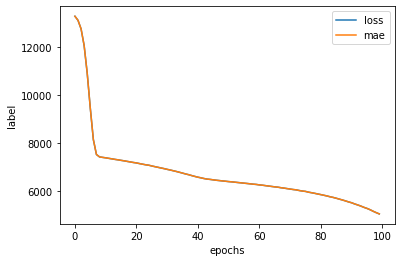

In [148]:
pd.DataFrame(history.history).plot()
plt.ylabel("label")
plt.xlabel("epochs");

In [149]:
history2 = insurance_model2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 4989.6216 - mae: 4989.6216
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 4915.0654 - mae: 4915.0654
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 4841.5215 - mae: 4841.5215
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 4761.9380 - mae: 4761.9380
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 4682.8130 - mae: 4682.8130
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 4606.6284 - mae: 4606.6284
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 4510.3047 - mae: 4510.3047
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 4421.1694 - mae: 4421.1694
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 4349.3516 - mae: 4349.3516
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 4256.1748 - mae: 4256.1748

In [152]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3495.8025 - mae: 3495.8025


(3495.802490234375, 3495.802490234375)

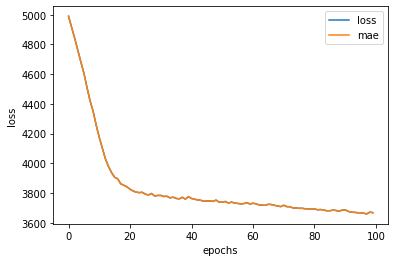

In [153]:
pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [154]:
# 신경망으로 학습을 할 때 신경망에 전달하는 데이터를 0 ~ 1사이의 값으로 전달해 주는 것인 일반적이다!
# normalization (scaling을 한다 => 원래의 값들의 범위를 0 ~ 1 사이로 조정해 주는 것)
# standardization : 데이터를 평균이 0이고 분산으로 값을 조정해 주는 것것

In [155]:
# 신경망에 데이터를 전달하기 전에 전처리하는 것들...
# 1) 문자 및 범주형 데이터를 숫자로 변경
# 2) 데이터를 적절한 shape롤 변경 (입력과 출력의 형태에 맞도록)
# 3) normalization

In [157]:
import pandas as  pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [158]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [159]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [162]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [164]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # 0 ~ 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [165]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [166]:
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 42
)

In [168]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [169]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [170]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [171]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [172]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [174]:
tf.random.set_seed(42)

insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = insurance_model3.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [175]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5781 - mae: 3171.5781


In [177]:
insurance_model_2_mae, insurance_model_3_mae

(3495.802490234375, 3171.578125)